DEFINICIÓN DEL PROBLEMA:

-El dataset contiene datos sobre diferentes características de distintos modelos de coches.

-Se intentará inferir conocimiento sobre cómo esas características influyen sobre el precio del coche (variable objetivo).

In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [42]:
car_df_raw = pd.read_csv('./CarPrice_Assignment.csv')

print(car_df_raw.columns.values)

['car_ID' 'symboling' 'CarName' 'fueltype' 'aspiration' 'doornumber'
 'carbody' 'drivewheel' 'enginelocation' 'wheelbase' 'carlength'
 'carwidth' 'carheight' 'curbweight' 'enginetype' 'cylindernumber'
 'enginesize' 'fuelsystem' 'boreratio' 'stroke' 'compressionratio'
 'horsepower' 'peakrpm' 'citympg' 'highwaympg' 'price']


FEATURE DESCRIPTION:

-Car_ID: id del producto

-Symboling: ?

-CarName: nombre del modelo

-fueltype: gasolina o diesel

aspiration: turbo (compresor mete aire al motor) o standard (el motor usa el aire atmosférico sin compresor)

-doornumber: numero de puertas

-carbody: tipo de coche: sedan (berlina), convertible (descapotable), etc

-drivewheel: que ruedas conecta la transmision con el motor: fwd (ruedas delanteras), rwd (ruedas traseras), etc

-enginelocation: indica si el motor esta delante o detras

-wheelbase: distancia entre las ruedas traseras y delanteras

-carlength: longitud del coche

-carwidth: ancho del coche

-carheight: añtura del coche

-curbweight: peso del vehículo con un tanque de gasolina lleno y equipamiento standard.

-enginetype: tipo de motor

-cylindernumber: numero de cilindros

-enginesize: volumen del motor

-fuelsystem: sistema de alimentacion de combustible

-boreratio: relacion diametro (del cilindro) - carrera (del piston)

-stroke: carrera del piston

-compresionratio: 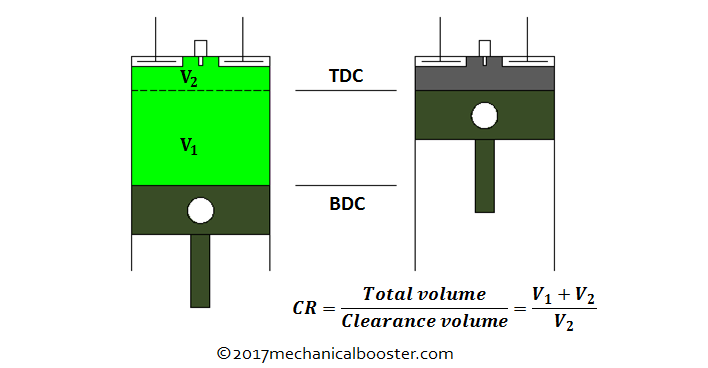

-horsepower: potencia 

-peakrpm: rpm máximas

-citympg: millas por galon de combustible en ciudad

-highwaympg: millas por galon de gasolina en autopista

-price (variable dependiente): precio 


In [67]:
car_df_raw.head(10)

#print(car_df_raw[['cylindernumber']].drop_duplicates())
#print(car_df_raw[['carbody']].drop_duplicates())
#print(car_df_raw[['drivewheel']].drop_duplicates())
#print(car_df_raw[['enginetype']].drop_duplicates())
#print(car_df_raw[['fuelsystem']].drop_duplicates())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


LIMPIEZA DE LOS DATOS

-Eliminar el id del coche porque no aporta informacion relativa al precio

-Eliminar el nombre de los datos porque no aporta información relativa al precio

-Eliminar la variable symboling porque no se conoce su significado

-Eliminar la variable wheelbase porque aporta información muy similar a la variale carlength

-Eliminar la variable engine location porque el 99% de los registros tienen el motor en la parte de delante

-----

-fueltype: gas = 1, diesel = 0 a

-aspiration: std = 1, turbo = 0 a

-doornumber: four = 4, two = 2 a 

-cardbody -> aplicar one-hot-encoder (metodo de las variables dummy)(sedan, hatchback, resto) ax

-drivewheel -> fwd = 1, el resto = 0 ax

-engine type -> ohc = 1, el resto = 0 ax

-Cambiar la variable cualitativa cylindernumber por un int a

-fuel system -> one hot encoder (mpfi, 2bbl, resto) ax


In [44]:
car_df = car_df_raw.drop(['car_ID', 'CarName', 'symboling', 'wheelbase', 'enginelocation'], axis = 1)

car_df['fueltype'] = car_df['fueltype'].replace(['gas', 'diesel'], [1, 0])

car_df['aspiration'] = car_df['aspiration'].replace(['std', 'turbo'], [1, 0])

car_df['doornumber'] = car_df['doornumber'].replace(['four', 'two'], [4, 2])

car_df['cylindernumber'] = car_df['cylindernumber'].replace(['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'], [2, 3, 4, 5, 6, 8, 12])

car_df['carbody'] = car_df['carbody'].replace(['convertible', 'wagon', 'hardtop'], 'other')

car_df['drivewheel'] = car_df['drivewheel'].replace(['rwd', '4wd'], 'other')

car_df['enginetype'] = car_df['enginetype'].replace(['dohc', 'ohcv', '1', 'rotor', 'ohcf', 'dohcv'], 'other')

car_df['fuelsystem'] = car_df['fuelsystem'].replace(['mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], 'other')


#------

column_transform = make_column_transformer(
    (OneHotEncoder(), ['carbody', 'fuelsystem', 'drivewheel', 'enginetype']),
    remainder = 'passthrough')

X = column_transform.fit_transform(car_df.drop(['price'], axis=1))
Y = car_df[['price']]

car_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,carlength,carwidth,carheight,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,2,other,other,168.8,64.1,48.8,2548,other,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,2,other,other,168.8,64.1,48.8,2548,other,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,2,hatchback,other,171.2,65.5,52.4,2823,other,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,1,4,sedan,fwd,176.6,66.2,54.3,2337,ohc,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,1,4,sedan,other,176.6,66.4,54.3,2824,ohc,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


El modelo a escoger será el de regresión lineal, esto es porque se está intentando predecir una variable que es continua.

In [65]:
regr = linear_model.LinearRegression()

regr.fit(X, Y)

y_pred = regr.predict(X)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Y, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(Y, y_pred))

Coefficients: 
 [[-1.11354735e+03  4.42206160e+02  6.71341190e+02  5.50234261e+02
  -2.19329707e+02 -3.30904554e+02 -1.15432039e+03  1.15432039e+03
  -1.16652191e+03  1.37098489e+03 -2.04462973e+02 -8.56121892e+03
   3.87201398e+02 -1.45776455e+02 -1.09906143e+02  1.02504493e+03
   2.11162121e+02  1.70756160e-01 -2.37686172e+03  1.82103276e+02
  -5.84844349e+03 -5.22286051e+03 -3.17815061e+02  5.30982256e+01
   2.29839926e+00 -1.83388059e+02  1.39901154e+02]]
Independent term: 
 [-29755.37939884]
Mean squared error: 7653642.08
Variance score: 0.88


Aunque el error cuadrático medio es muy elevado esto se debe a que la variable objetivo tiene también valores elevados, el variance score no es demasiado alto pero podría ser peor.

Como se trata de una regresión con múltiples variables continuas y multiples variables dummy la representacion es poco viable.